In [111]:
import warnings
warnings.simplefilter('ignore')

import ukdata as data
import time
from datetime import datetime
import pandas as pd
import numpy as np

import refitdata as refit
from matplotlib import pyplot as plt
import random
import timeit
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as dates
import seaborn as sns
dark_colors = ["#A51C30", "#808080",
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]
# dark_colors = ['#A51C30', '#808080']
rcParams['figure.figsize'] = (13, 6)
rcParams['figure.dpi'] = 600
rcParams['axes.color_cycle'] = dark_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = "white"
rcParams['axes.titlesize'] = 12      
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 12
rcParams['patch.edgecolor'] = 'none'
rcParams['grid.color']="gray"   
rcParams['grid.linestyle']="-" 
rcParams['grid.linewidth'] = 0.3
%matplotlib inline

## Load UK DALE

In [136]:
path = "/home/ibcn079/data/ukdale/"
WINDOW_SIZE= 2000
Threshold =10   
appliance = 'fridge'

In [143]:
aggregate, iam = data.generate_clean_data(path, appliance,buildings=[1,2])

/home/ibcn079/data/ukdale/house1/
Reading house: 1
/home/ibcn079/data/ukdale/house2/
Reading house: 2
size of aggregate: 2780373
size of meters: 1687285


In [144]:
def resample_data(main, meter):
    '''Convernt time column into index and downsampling aggregate data 
    from 1s data to ~6s data as it was sampled for each individual appliance

    Attributes
    ----------
    main :  Aggregate dataframe
    meter : appliance dataframe

    Return : 
       [pandas.Dataframe] main, meter - so it can be  possibly for some other transformations)

    '''
    main.index = main['Time']
    meter.index = meter['Time']

    del meter['Time']
    del main['Time']

    meter = meter[meter.index.isin(main.index)]
    main = main[main.index.isin(meter.index)]
    
    return main, meter

In [145]:
main, app = resample_data(main=aggregate, meter=iam)

In [146]:
frg = app['2013-05-20 21:28:39':'2013-05-20 22:20:39']
agg = main['2013-05-20 21:28:39':'2013-05-20 22:20:39']

Text(0,0.5,'Power ($W$)')

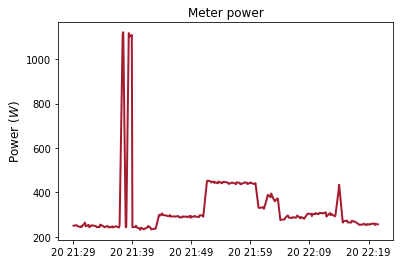

In [147]:
plt.plot(pd.DatetimeIndex(frg.index).to_pydatetime(),agg)
plt.title("Meter power")
plt.ylabel('Power ($W$)')

Text(0,0.5,'Power ($W$)')

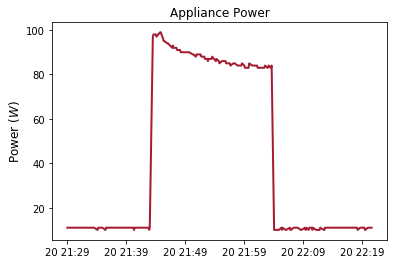

In [148]:
plt.plot(pd.DatetimeIndex(frg.index).to_pydatetime(),frg)
plt.title("Appliance Power")
plt.ylabel('Power ($W$)')

## Window

In [24]:
agg_refit, iam_refit =refit.generate_clean_data2(path, appliance=appliance_name)

Reading house: 1
Reading house: 2


## Process DATA